In [1]:
import numpy as nm
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as mtp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB

data_set=pd.read_csv(r"C:\Users\hegde\Downloads\User_Data.csv")

In [2]:
x=data_set.iloc[:,[2,3]].values
y=data_set.iloc[:,4].values

#splitting the dataset into the training set and test set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature scaling

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# print(x_test)

In [3]:
data_set.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [5]:
y_pred=classifier.predict(x_test)

In [6]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

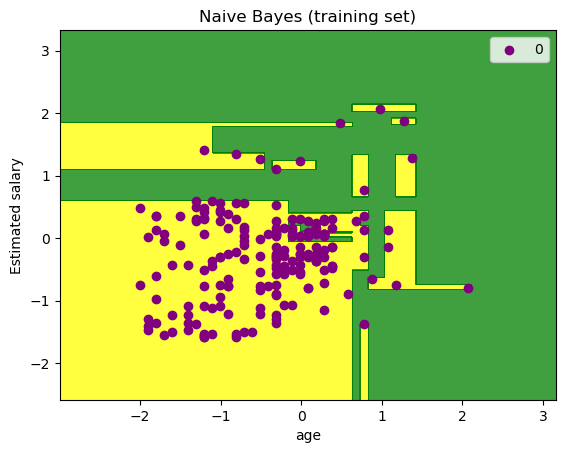

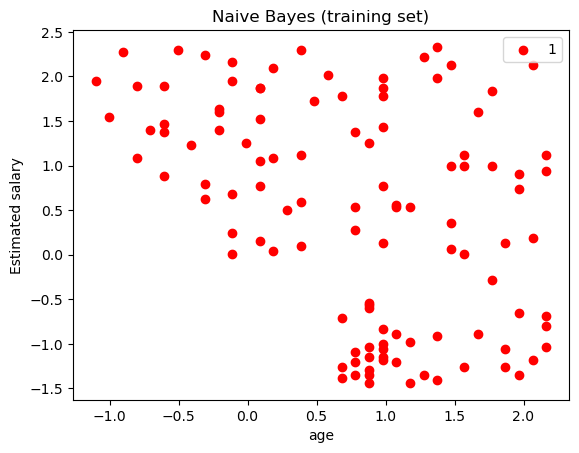

In [7]:
#visualising the training set results
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train

X1,X2=nm.meshgrid(nm.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  nm.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

mtp.contourf(X1,X2,classifier.predict(nm.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('yellow','green')))
mtp.xlim(X1.min(),X1.max())
mtp.ylim(X2.min(),X2.max())

for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                color=ListedColormap(('purple','red'))(i),label=j)
    
    mtp.title("Naive Bayes (training set)")
    mtp.xlabel('age')
    mtp.ylabel('Estimated salary')
    mtp.legend()
    mtp.show()

# Decision Tree Classifier BUilding in Scikit-learn on diabetes dataset

In [8]:
pima=pd.read_csv(r"C:\Users\hegde\Downloads\diabetes.csv")

In [9]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#split dataset in features and target variable
feature_cols=['Pregnancies','Glucose','BloodPressure','Age','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
X=pima[feature_cols]
y=pima.Outcome

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [13]:
#creat decision tree classifier object
clf=DecisionTreeClassifier()

#train decision tree classifier
clf=clf.fit(X_train,y_train)

#predict response for test dataset
y_pred=clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [17]:
print("Accuracy;",metrics.accuracy_score(y_test,y_pred))

Accuracy; 0.70995670995671


In [18]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [19]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable


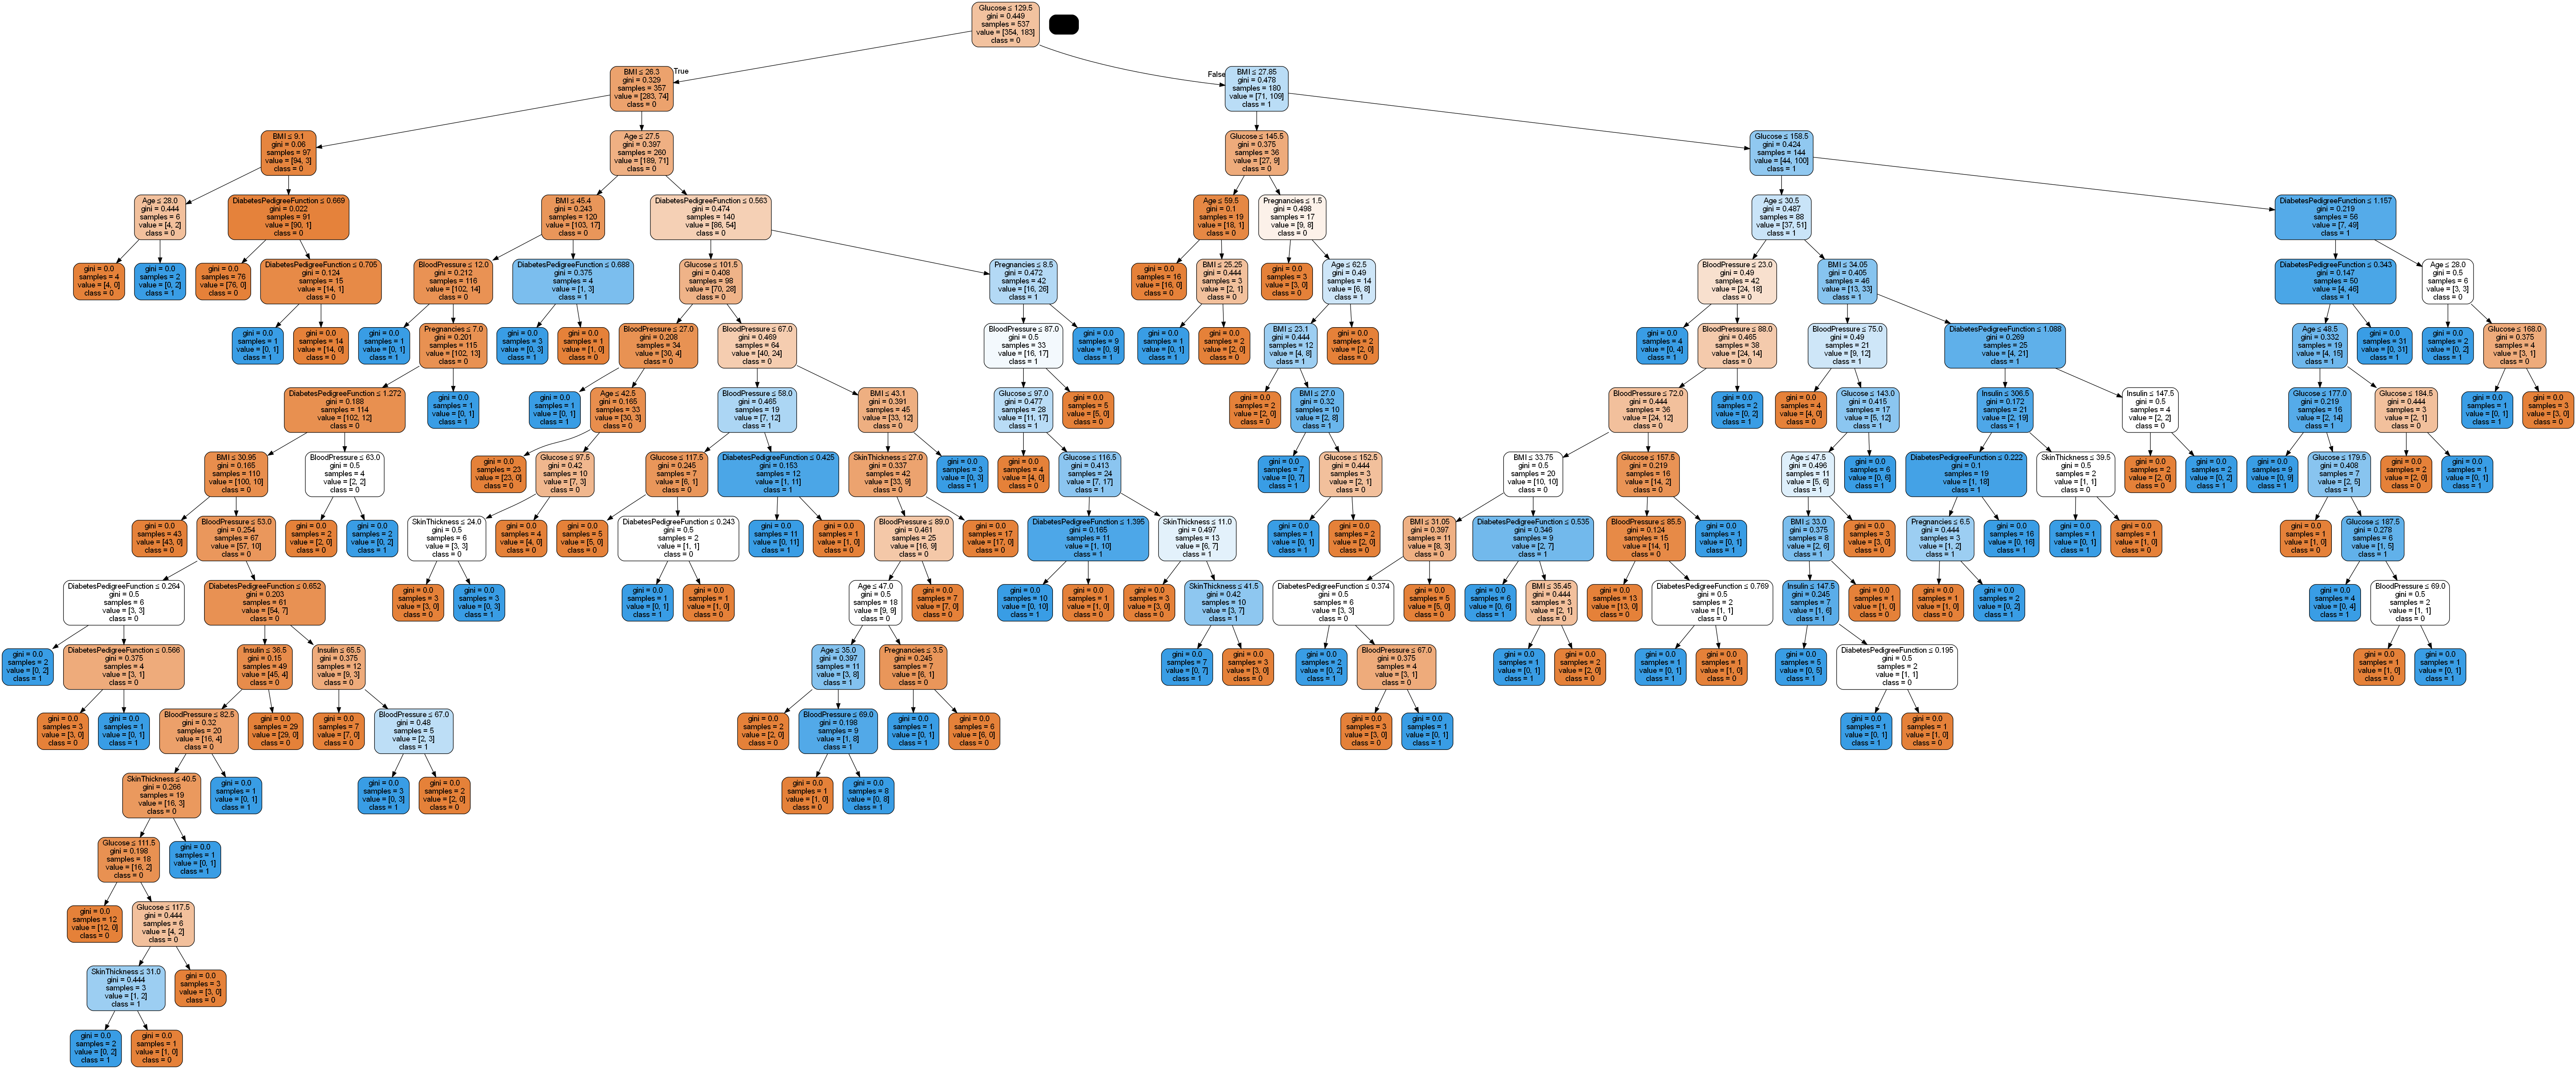

In [20]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True,feature_names=feature_cols,class_names=['0','1'])

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [26]:
#creat decision tree classifier object
clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)

#train decision tree classifier
clf=clf.fit(X_train,y_train)

#predict response for test dataset
y_pred=clf.predict(X_test)
print("Accuracy;",metrics.accuracy_score(y_test,y_pred))

Accuracy; 0.7705627705627706


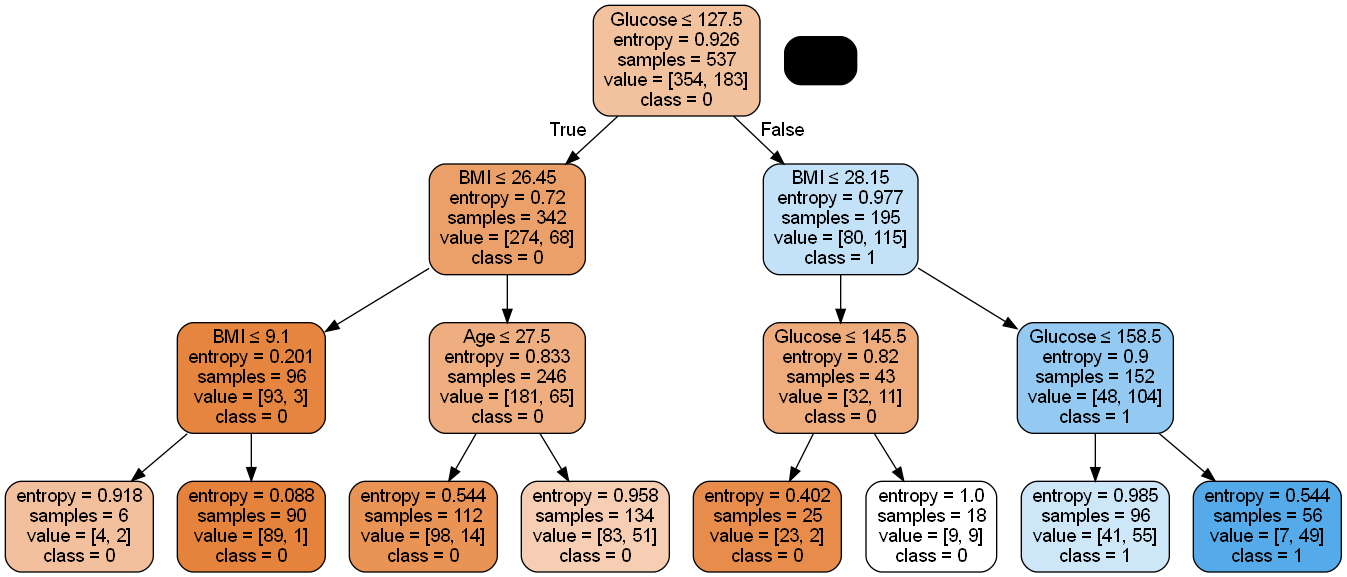

In [27]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True,feature_names=feature_cols,class_names=['0','1'])

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes1.png')
Image(graph.create_png())

In [28]:
#creat decision tree classifier object
clf=DecisionTreeClassifier(criterion="gini",max_depth=3)

#train decision tree classifier
clf=clf.fit(X_train,y_train)

#predict response for test dataset
y_pred=clf.predict(X_test)
print("Accuracy;",metrics.accuracy_score(y_test,y_pred))

Accuracy; 0.7575757575757576


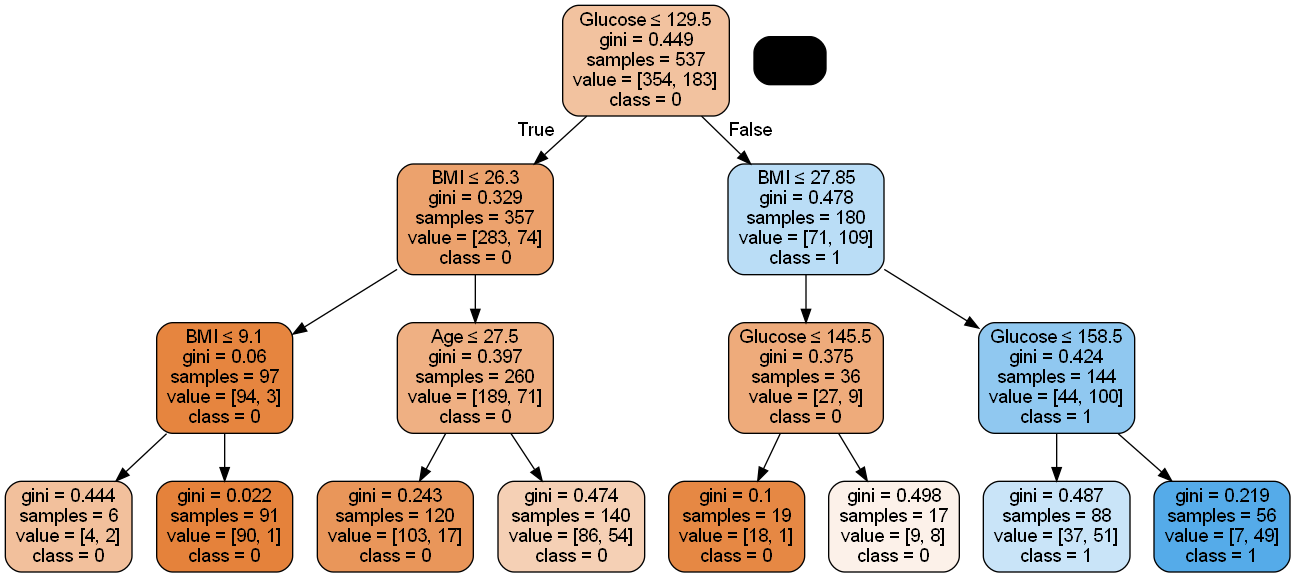

In [29]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True,feature_names=feature_cols,class_names=['0','1'])

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes2.png')
Image(graph.create_png())

# Decission tress regressor building in sckit learn

In [30]:
dataset=pd.read_csv(r"C:\Users\hegde\Downloads\Position_Salaries.csv")


In [31]:
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values

In [32]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [33]:
y_pred=regressor.predict([[13]])
y_pred

array([1000000.])

C:\Users\hegde\AppData\Local\Temp\ipykernel_10520\2643410038.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=nm.arange(min(X),max(X),0.01)


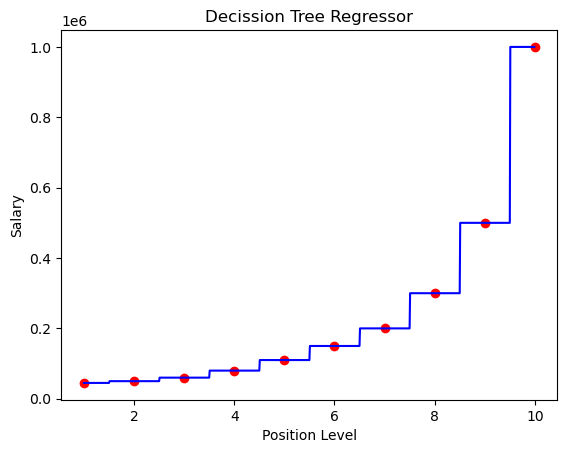

In [34]:
import matplotlib.pyplot as plt
X_grid=nm.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Decission Tree Regressor')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()